# Getting started
Once FluidSF is installed, you can load the module into Python and run some basic calculations with random data.

In [1]:
import matplotlib_inline.backend_inline
import numpy as np
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("png", dpi=200)

### Create a 2D velocity field

We will generate u and v velocity arrays that increase linearly in x and y, respectively.

In [118]:
nx, ny = 100, 100
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

u = np.sin(4 * np.pi * Y) * Y
v = X * (np.sin(2 * np.pi * X) * np.sin(2 * np.pi * Y))


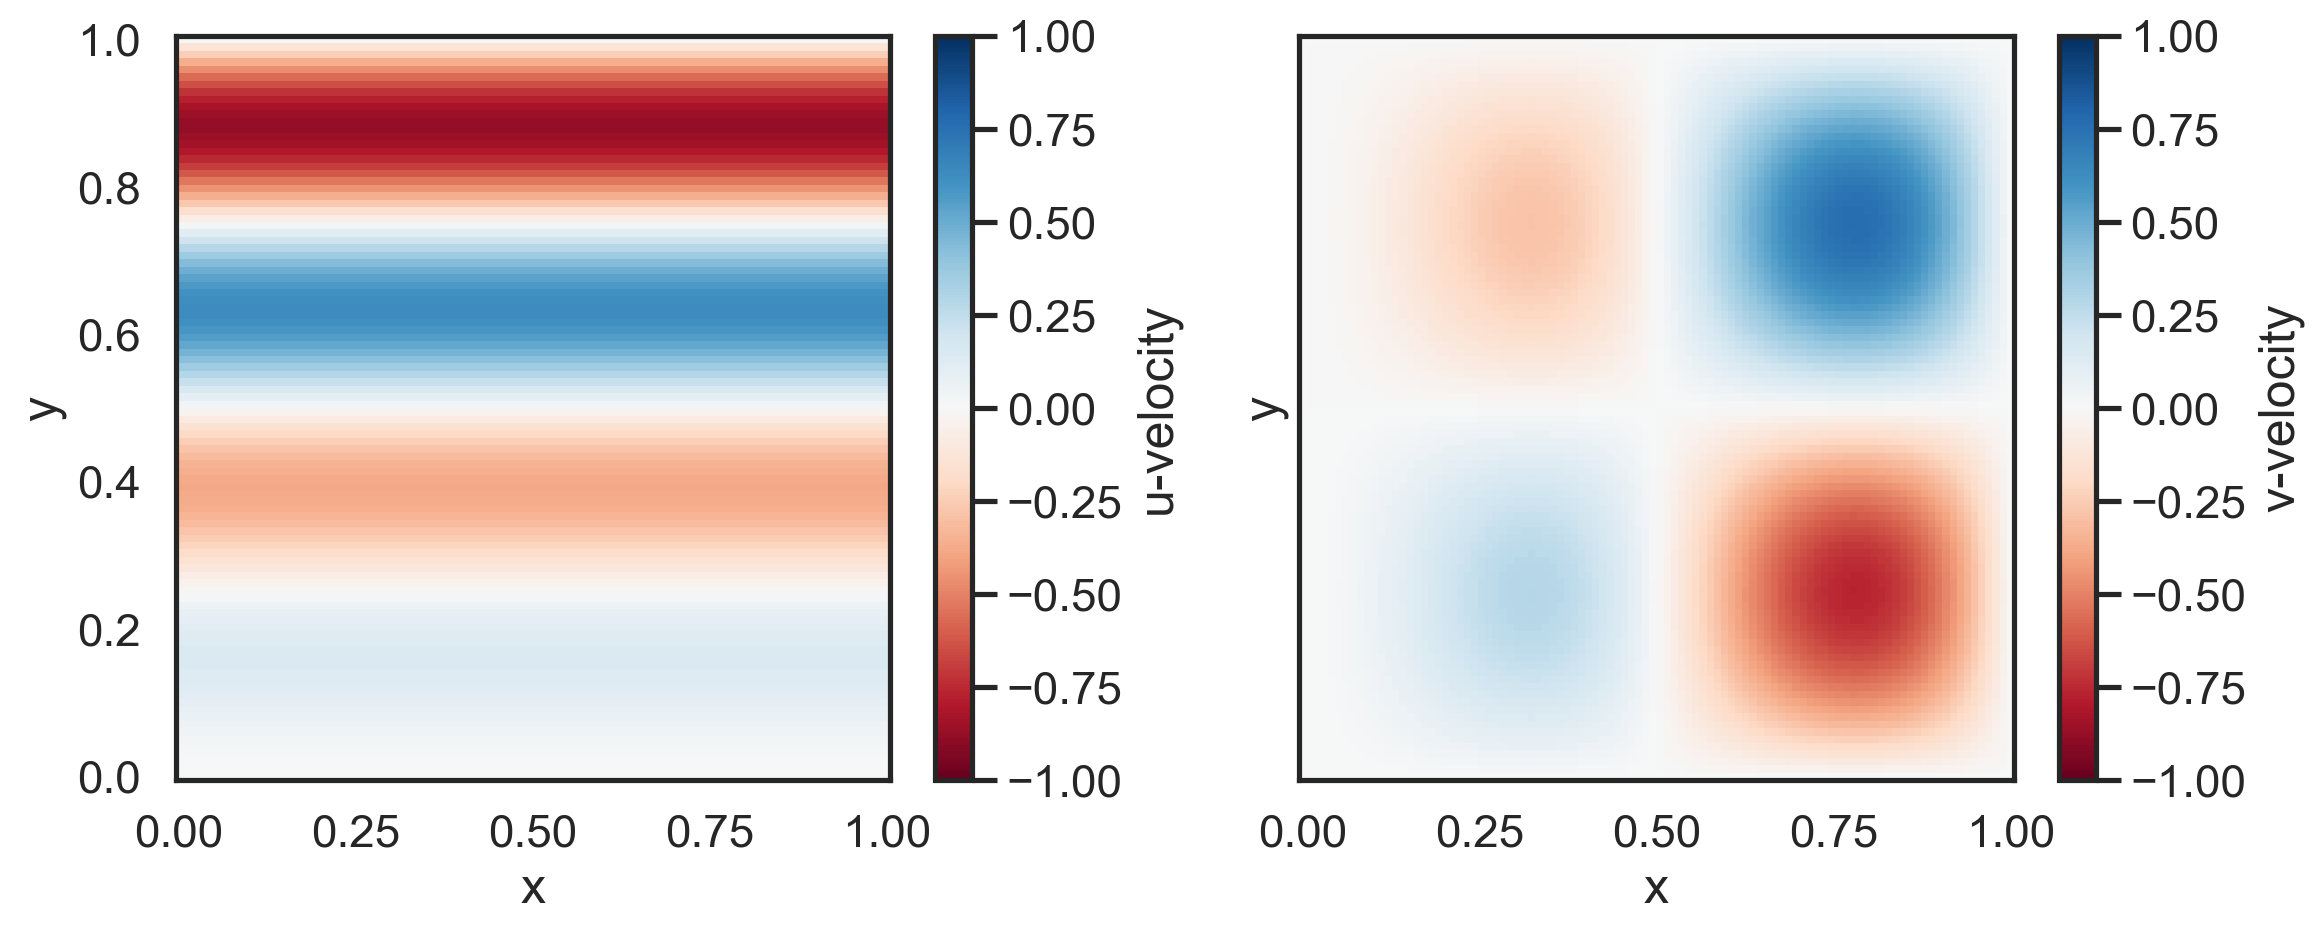

In [119]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5))
p1 = ax1.pcolormesh(x,y,u, cmap='RdBu', vmin=-1, vmax=1)
p2 = ax2.pcolormesh(x,y,v, cmap='RdBu', vmin=-1, vmax=1)
fig.colorbar(p1,label='u-velocity')
fig.colorbar(p2, label='v-velocity')
ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_ylabel('y')
plt.tight_layout()

### Generate the advective velocity structure function

We can generate the advective structure function using the function `generate_structure_functions`. The function returns a dictionary with the all supported structure functions and separation distances in each direction. By default the advective velocity structure functions are calculated and the remaining structure functions are set to `None`. We set the boundary condition to `None` because our random data is non-periodic. If we had periodic data we could set the boundary condition based on the direction of periodicity (i.e. `boundary="periodic-x"` or `boundary="periodic-y"` for 2D data). 

In [120]:
import fluidsf

sf = fluidsf.generate_structure_functions(u, v, x, y, boundary=None, traditional_type=["LLL", "LL", "LTT"])

The keys of the dictionary `sf` are 

- `SF_advection_velocity_dir`: Advective velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_advection_scalar_dir`: Advective scalar structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LL_dir`: Longitudinal second order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LLL_dir`: Longitudinal third order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LTT_dir`: Longitudinal-transverse-transverse third order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LSS_dir`: Longitudinal-scalar-scalar third order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `dir-diffs`: Separation distances in each direction (`dir` = `x`, `y`, `z`).

### Plot the advective velocity structure functions in x and y

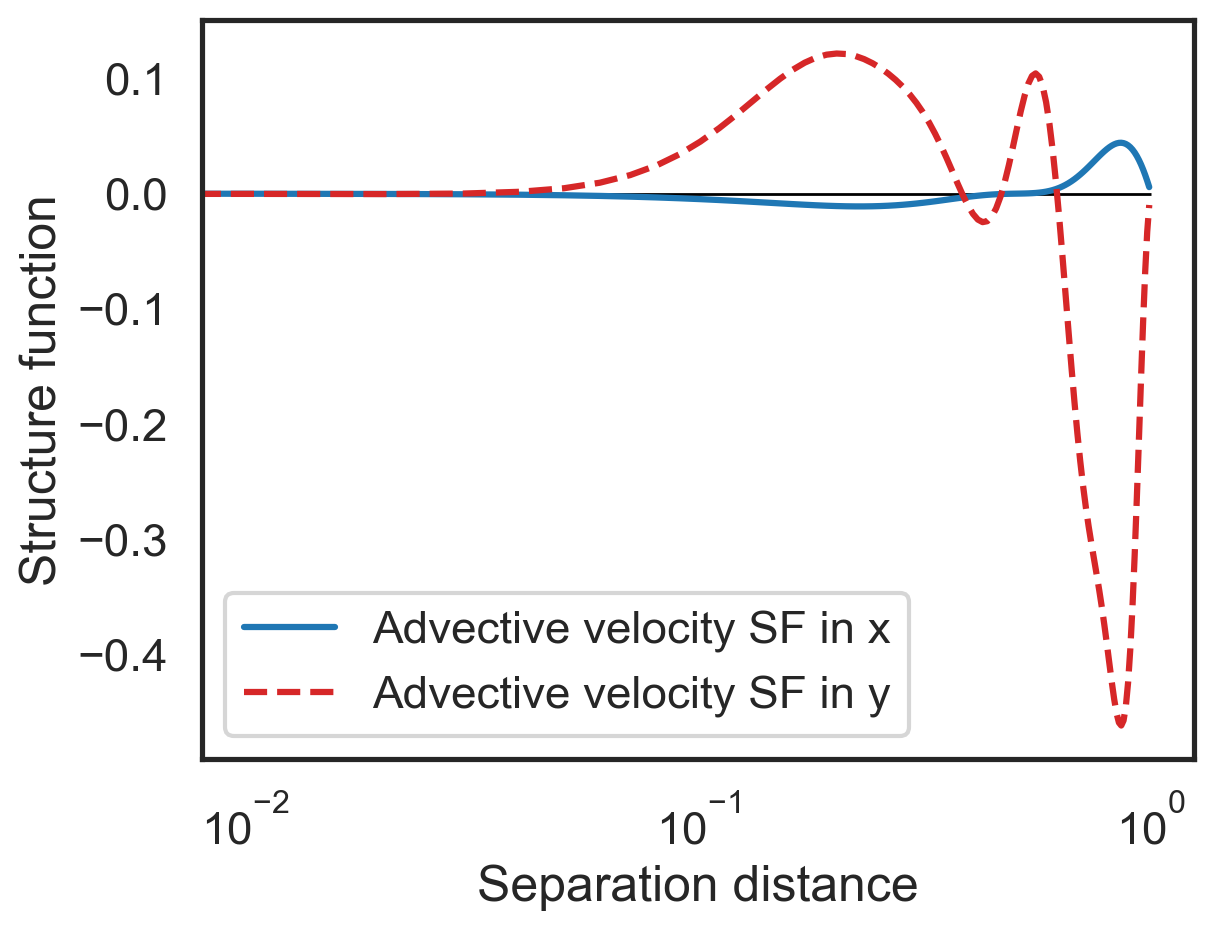

In [123]:
fig, ax = plt.subplots()
ax.semilogx(sf["x-diffs"], sf["SF_advection_velocity_x"], 
        label="Advective velocity SF in x", color='tab:blue')
ax.semilogx(sf["y-diffs"], sf["SF_advection_velocity_y"], 
        label="Advective velocity SF in y", color='tab:red', linestyle='dashed')
plt.hlines(0, 0, 1, color='k', lw=1,zorder=0)
ax.set_xlabel("Separation distance")
ax.set_ylabel("Structure function")
ax.legend()
plt.show()

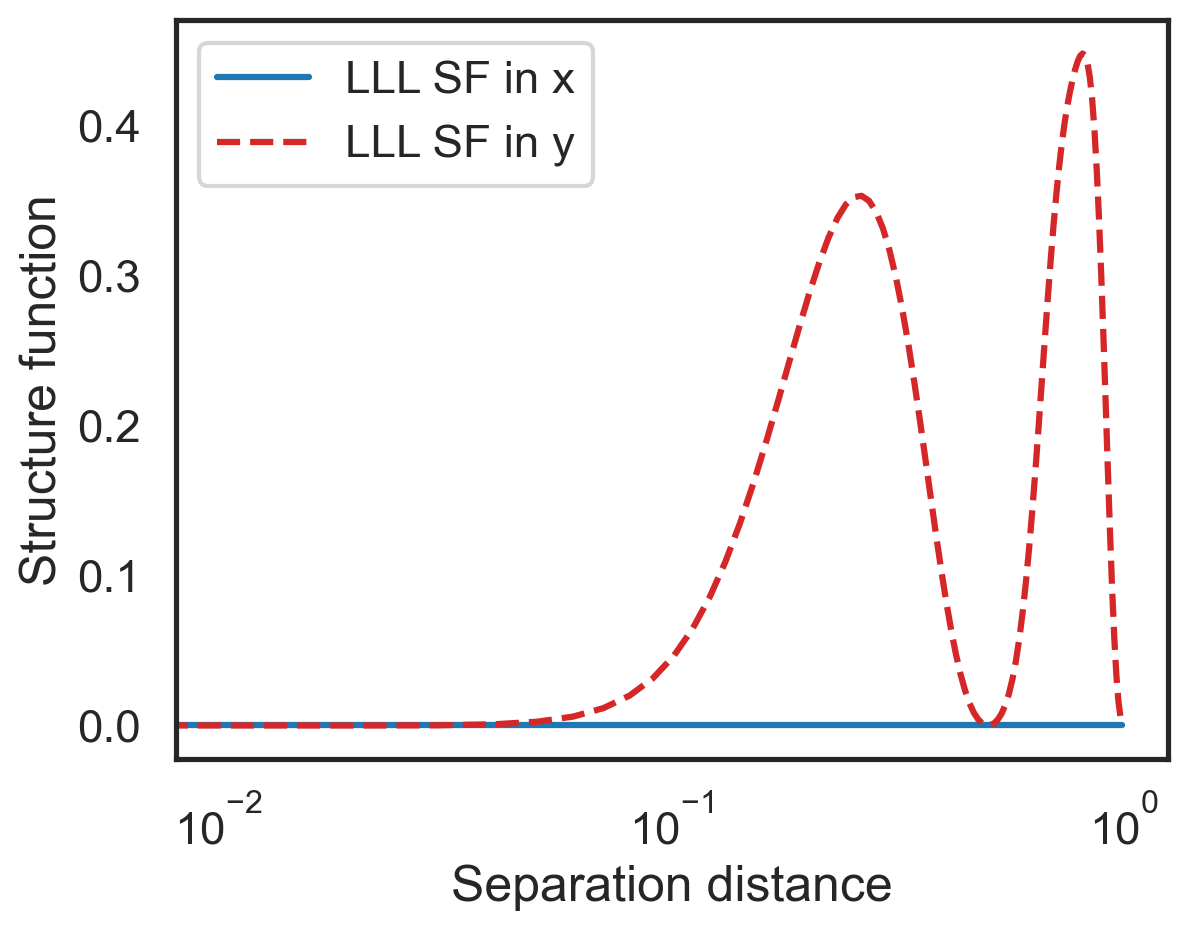

In [124]:
fig, ax = plt.subplots()
ax.semilogx(sf["x-diffs"], sf["SF_LLL_x"], 
        label="LLL SF in x", color='tab:blue')
ax.semilogx(sf["y-diffs"], sf["SF_LLL_y"], 
        label="LLL SF in y", color='tab:red', linestyle='dashed')
plt.hlines(0, 0, 1, color='k', lw=1,zorder=0)
ax.set_xlabel("Separation distance")
ax.set_ylabel("Structure function")
ax.legend()
plt.show()

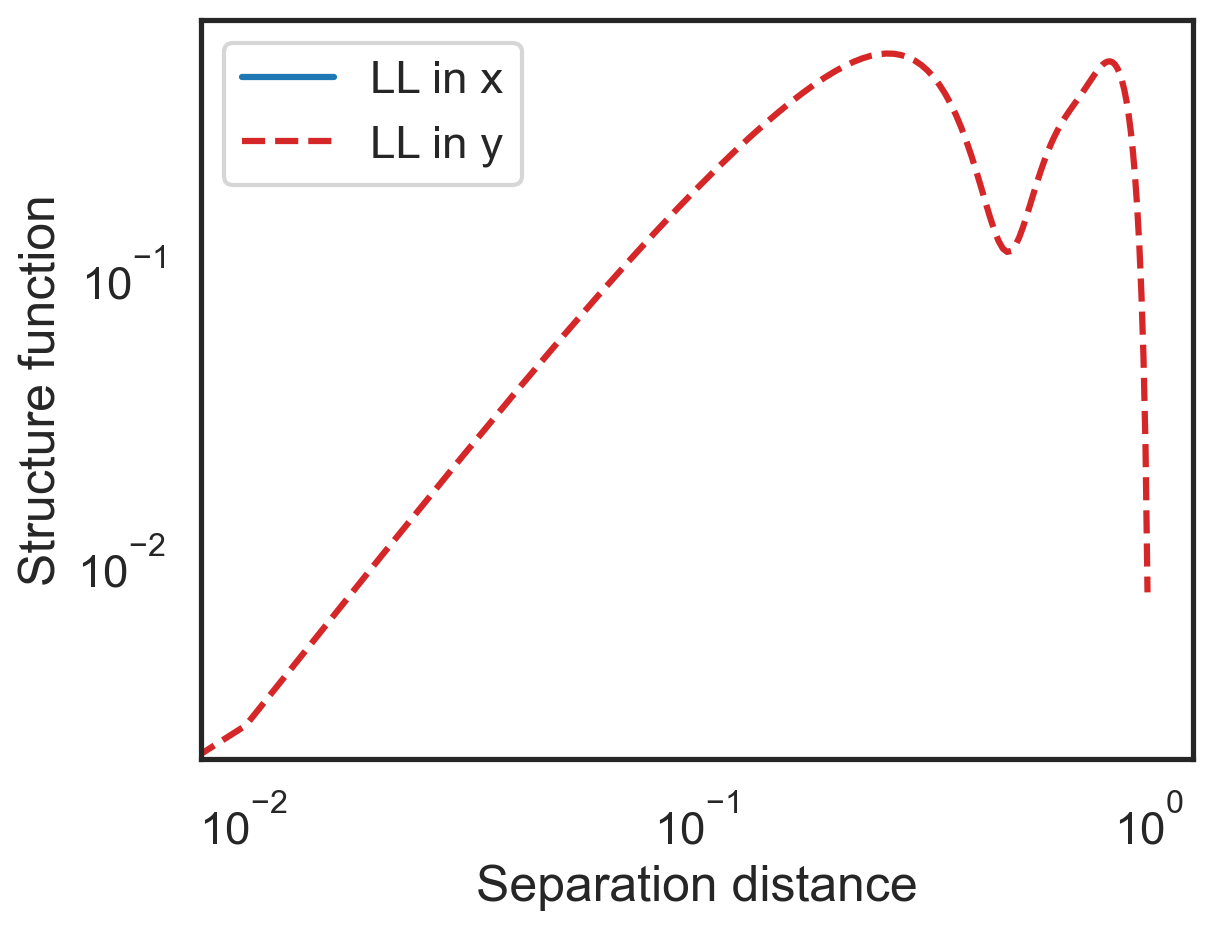

In [125]:
fig, ax = plt.subplots()
ax.loglog(sf["x-diffs"], sf["SF_LL_x"], 
        label="LL in x", color='tab:blue')
ax.loglog(sf["y-diffs"], sf["SF_LL_y"], 
        label="LL in y", color='tab:red', linestyle='dashed')
plt.hlines(0, 0, 1, color='k', lw=1,zorder=0)
ax.set_xlabel("Separation distance")
ax.set_ylabel("Structure function")
ax.legend()
plt.show()

### Advective scalar structure functions
The advective scalar structure functions can be generated by passing in an argument for a scalar field. The advective velocity structure function is still generated unless you pass the argument `skip_velocity_sf=True`.

In [128]:
S = 2 * X**2 + 3 * Y**2

sf = fluidsf.generate_structure_functions(u, v, x, y, scalar=S, boundary=None,
                                          skip_velocity_sf=True)

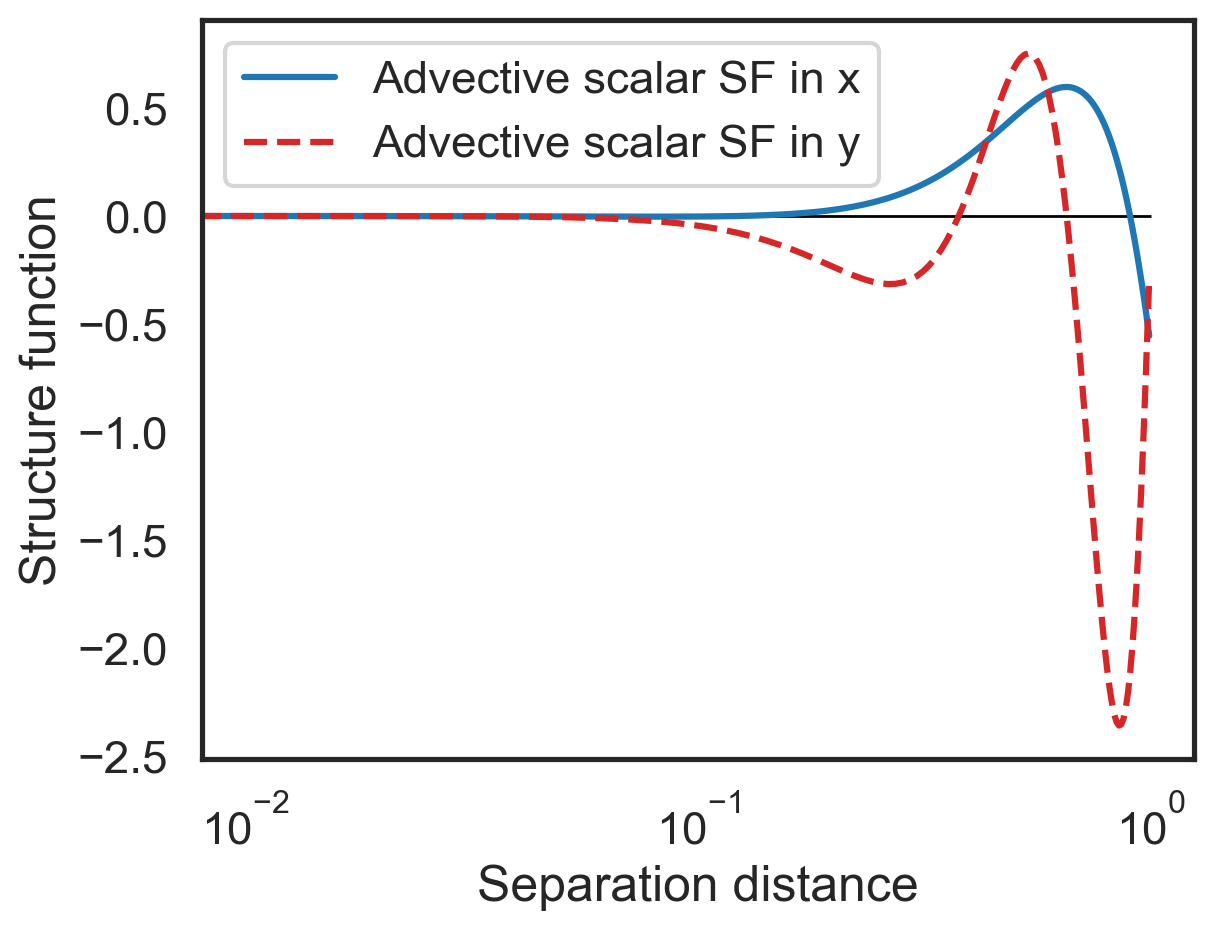

In [129]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.semilogx(sf["x-diffs"], sf["SF_advection_scalar_x"], label="Advective scalar SF in x", 
        color='tab:blue')
ax.semilogx(sf["y-diffs"], sf["SF_advection_scalar_y"], label="Advective scalar SF in y", 
        color='tab:red', linestyle='dashed')
plt.hlines(0, 0, 1, color='k', lw=1,zorder=0)
ax.set_xlabel("Separation distance")
ax.set_ylabel("Structure function")
ax.legend()
plt.show()